In [1]:
from Pipeline import BLEPipeline, WifiPipeline

# General data processing
import numpy as np
import pandas as pd

# Plotting
import matplotlib.pyplot as plt
import seaborn as sns
import scikitplot as skplt

# ML libraries
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import roc_curve, roc_auc_score

# System libraries
from itertools import izip, combinations
import random, time

# Warning filtering
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)
plt.rcParams.update({'figure.max_open_warning': 0})

# Create dataset

In [2]:
time_start = time.time()

In [3]:
b = BLEPipeline()

In [4]:
# w.extract_packet_features(create_master=True)

In [5]:
df = b.make_dataframe()

August2    210644
Home1       54902
Home2       54516
Push        30661
Kevo        19430
August1     15047
Weather      8101
Room2        7698
Room1        7239
Door1        6696
Door2        3587
Name: Name, dtype: int64


In [6]:
features_list = [
    # Packet info
    "PacketLength", "BLE_LL_Length", "Time", 
    
    # Associate Packets
    "Assoc_Packets",
    
    # Channel number
    "Channel_0", "Channel_12", "Channel_39",
    
    # PDU Type
    "SCAN_RSP", "ADV_IND", "SCAN_REQ", 
    "CONNECT_REQ", "ADV_NONCONN_IND", "ADV_DIRECT_IND"]

y_list = ["door", "lock", "temp"]

## Resample

### Downsampling

In [7]:
# Remove router device type and plug device type (not using plug because not enough devices)
df = df[(df["DeviceType"]!="router") & (df["DeviceType"]!="plug")]

df_train = df[df['Set']=='train']

# List variables that do not work with resampling methods
dataframe_vars = {'Name', 'DeviceName', 'Set', 
                  'AccessAddr', 'AdvertAddr','PDUTypeNum'}
onehotEncoded_vars = {'ADV_DIRECT_IND', 'ADV_IND', 
                      'ADV_NONCONN_IND', 'ADV_SCAN_IND', 
                      'CONNECT_REQ', 'SCAN_REQ', 'SCAN_RSP'}
response_vars = {"DeviceType","door","lock","temp"}
ble_devicetypes = ["door","lock","temp"]

# Prep X, y
y = df_train["DeviceType"]
col_drop = response_vars | dataframe_vars | onehotEncoded_vars
X = df_train.drop(col_drop, axis=1)

### Create trial dataframes

In [8]:
df_trials = []

while len(df_trials) != 10:
    df_downsampled = b.downsample(X, y, df[df["Set"]=="test"])

    # Ensure that the trial sample contains all features in feature list
    if set(features_list).issubset(set(df_downsampled.columns)):
        df_trials.append(df_downsampled)

## Run trials

In [9]:
df_results = []
for i, trial in enumerate(df_trials):
    print "Trial", i+1
    result = b.one_vs_all_classify(trial, [x for x in features_list if x in trial.columns], y_list)
    df_results.append(result)

Trial 1
Device Type: door
RF


Metrics
          FN      FP    TN    TP  Accuracy  Precision    Recall        F1
door    3382  211043  7299   205  0.033813   0.000970  0.057151  0.001908
rest  211043    3382   205  7299  0.033813   0.683363  0.033429  0.063740
---------------------------------------------------------
KNN


Metrics
          FN      FP     TN     TP  Accuracy  Precision    Recall        F1
door    2775  191995  26347    812  0.122377   0.004211  0.226373  0.008269
rest  191995    2775    812  26347  0.122377   0.904711  0.120668  0.212936
---------------------------------------------------------
LDA


Metrics
          FN      FP    TN    TP  Accuracy  Precision    Recall        F1
door    3570  210663  7679    17  0.034678   0.000081  0.004739  0.000159
rest  210663    3570    17  7679  0.034678   0.682638  0.035170  0.066893
---------------------------------------------------------
Total time (classifiers): 6.94674992561

Device Type: lock
RF


Metrics
          FN   

Device Type: door
RF


Metrics
          FN      FP    TN    TP  Accuracy  Precision    Recall        F1
door    3437  210525  7817   150  0.035899   0.000712  0.041818  0.001400
rest  210525    3437   150  7817  0.035899   0.694597  0.035802  0.068094
---------------------------------------------------------
KNN


Metrics
          FN      FP     TN     TP  Accuracy  Precision    Recall        F1
door    2767  191771  26571    820  0.123422   0.004258  0.228603  0.008360
rest  191771    2767    820  26571  0.123422   0.905685  0.121694  0.214559
---------------------------------------------------------
LDA


Metrics
          FN      FP    TN    TP  Accuracy  Precision    Recall        F1
door    3573  210662  7680    14  0.034669   0.000066  0.003903  0.000131
rest  210662    3573    14  7680  0.034669   0.682485  0.035174  0.066900
---------------------------------------------------------
Total time (classifiers): 6.90790295601

Device Type: lock
RF


Metrics
          FN      FP   

Device Type: door
RF


Metrics
          FN      FP    TN    TP  Accuracy  Precision    Recall        F1
door    3407  211028  7314   180  0.033768   0.000852  0.050181  0.001676
rest  211028    3407   180  7314  0.033768   0.682212  0.033498  0.063860
---------------------------------------------------------
KNN


Metrics
          FN      FP     TN     TP  Accuracy  Precision    Recall        F1
door    2757  190544  27798    830  0.128996   0.004337  0.231391  0.008515
rest  190544    2757    830  27798  0.128996   0.909769  0.127314  0.223370
---------------------------------------------------------
LDA


Metrics
          FN      FP    TN    TP  Accuracy  Precision    Recall        F1
door    3573  210662  7680    14  0.034669   0.000066  0.003903  0.000131
rest  210662    3573    14  7680  0.034669   0.682485  0.035174  0.066900
---------------------------------------------------------
Total time (classifiers): 7.02678084373

Device Type: lock
RF


Metrics
          FN      FP   

Device Type: door
RF


Metrics
          FN      FP    TN    TP  Accuracy  Precision    Recall        F1
door    3352  210158  8184   235  0.037936   0.001117  0.065514  0.002196
rest  210158    3352   235  8184  0.037936   0.709431  0.037482  0.071203
---------------------------------------------------------
KNN


Metrics
          FN      FP     TN     TP  Accuracy  Precision    Recall        F1
door    2768  191141  27201    819  0.126257   0.004267  0.228325  0.008377
rest  191141    2768    819  27201  0.126257   0.907638  0.124580  0.219088
---------------------------------------------------------
LDA


Metrics
          FN      FP    TN    TP  Accuracy  Precision    Recall        F1
door    3573  210662  7680    14  0.034669   0.000066  0.003903  0.000131
rest  210662    3573    14  7680  0.034669   0.682485  0.035174  0.066900
---------------------------------------------------------
Total time (classifiers): 6.79804301262

Device Type: lock
RF


Metrics
          FN      FP   

## Reports

### AUC

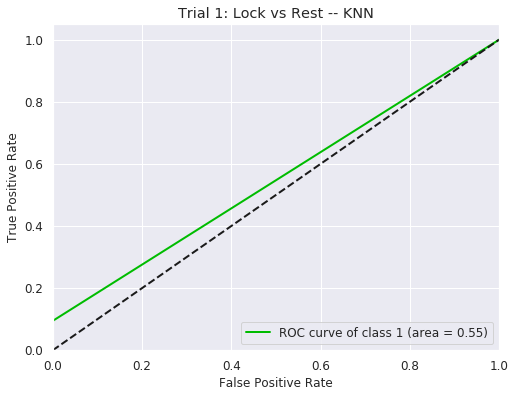

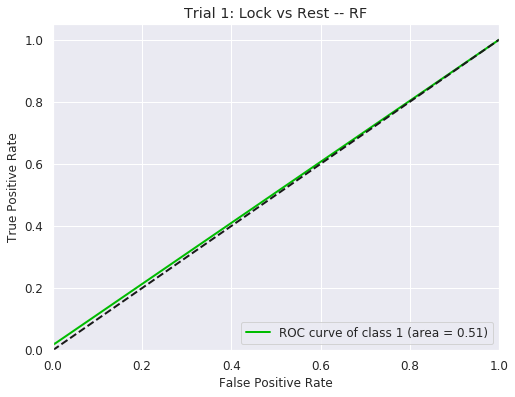

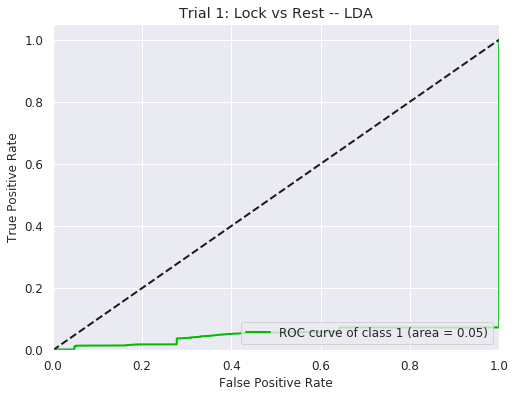

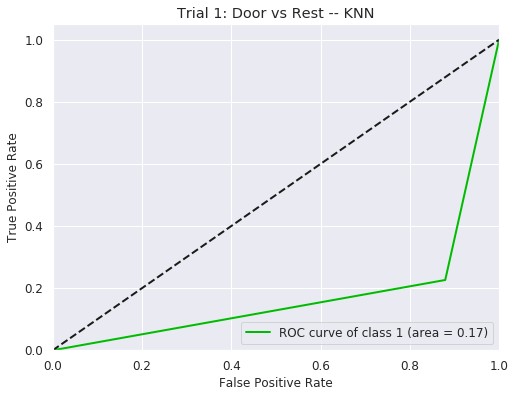

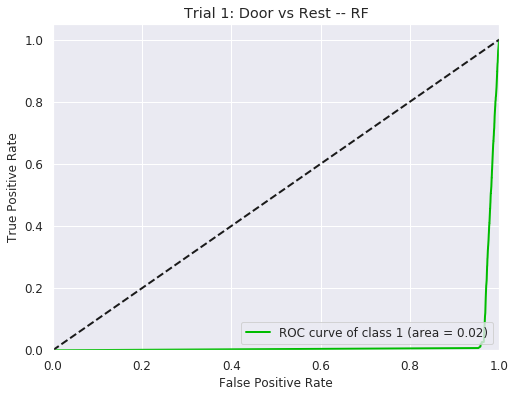

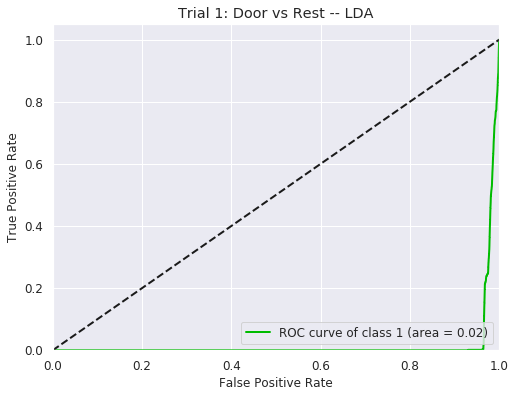

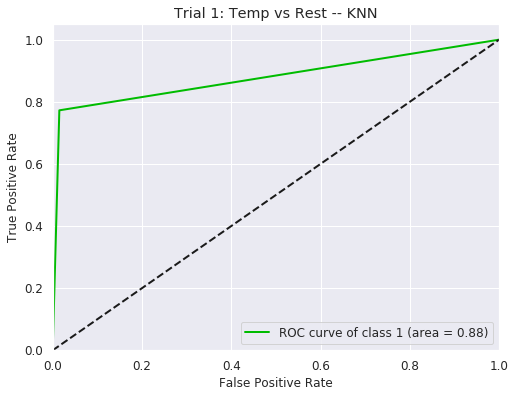

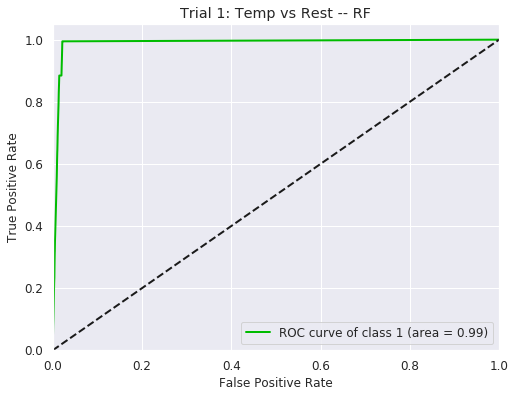

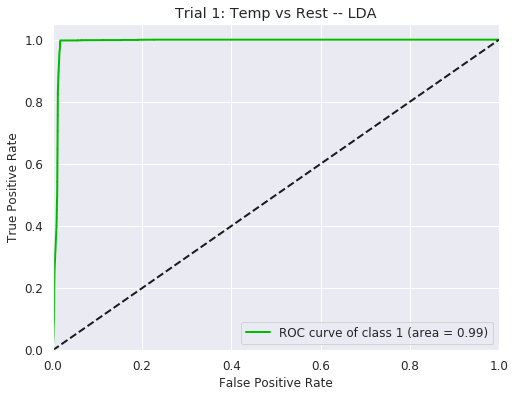

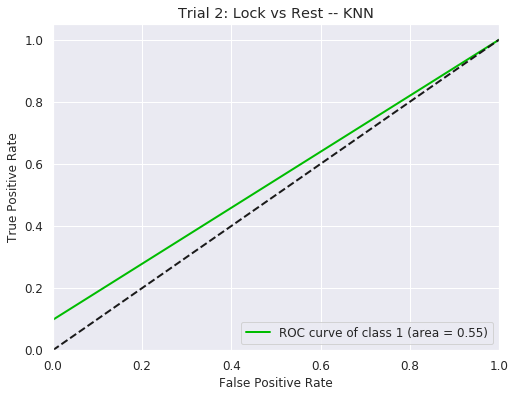

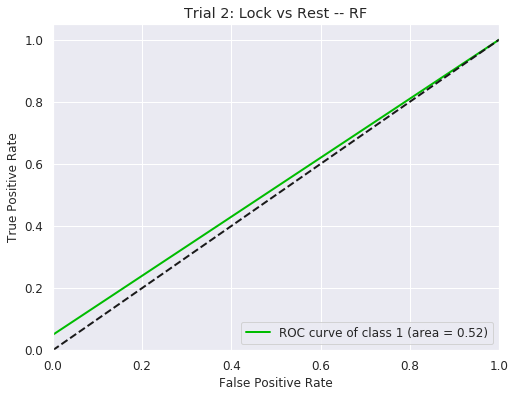

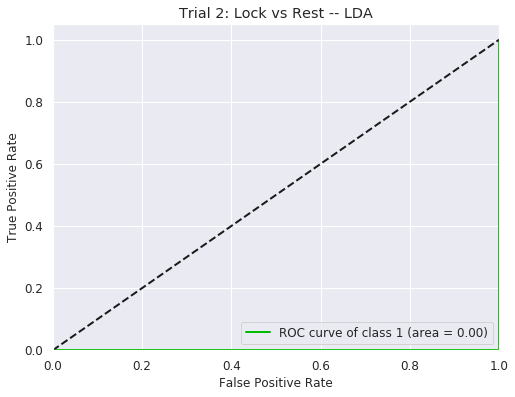

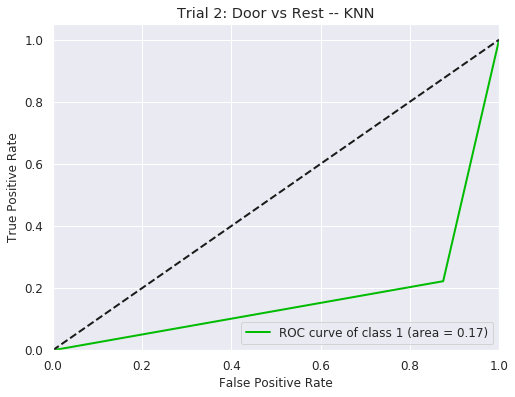

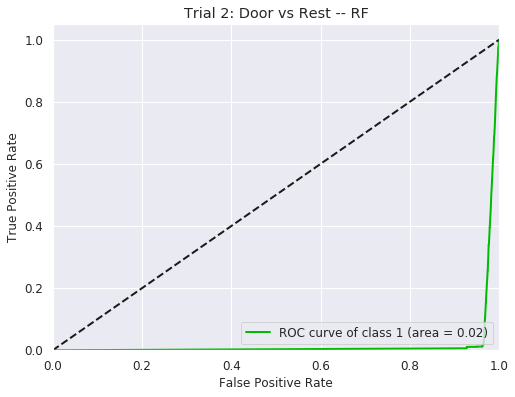

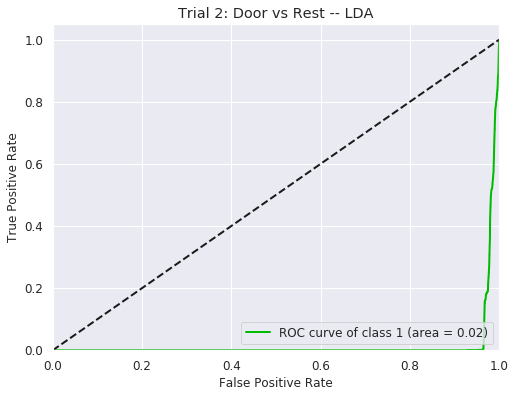

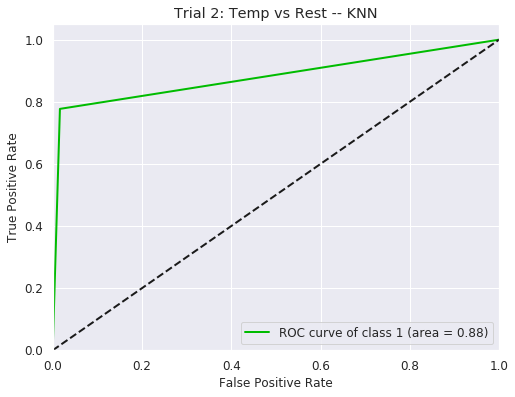

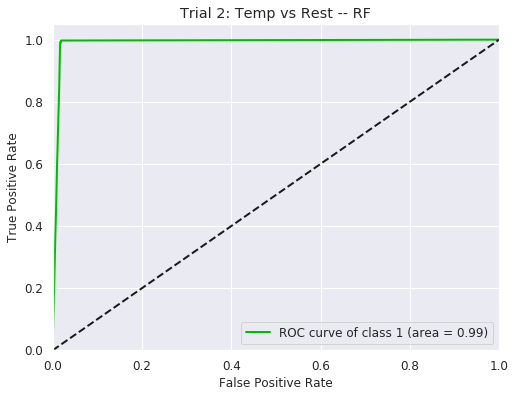

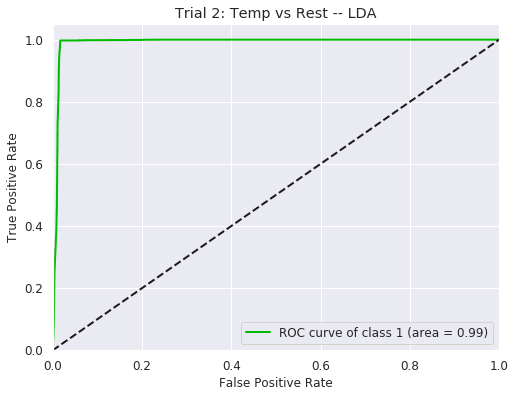

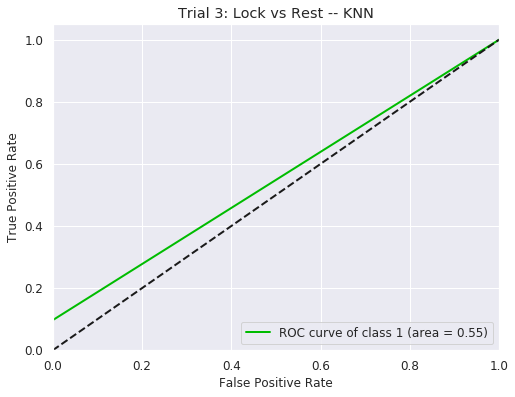

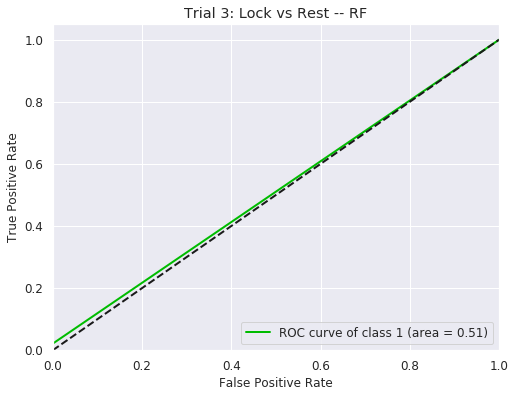

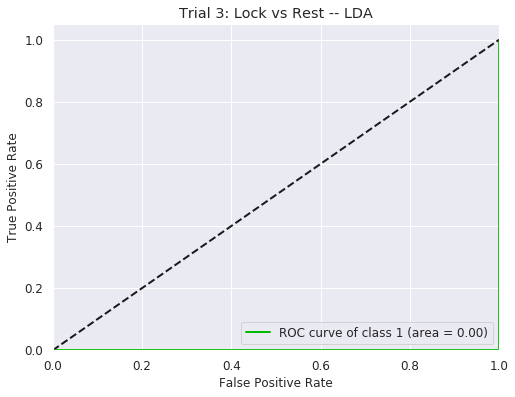

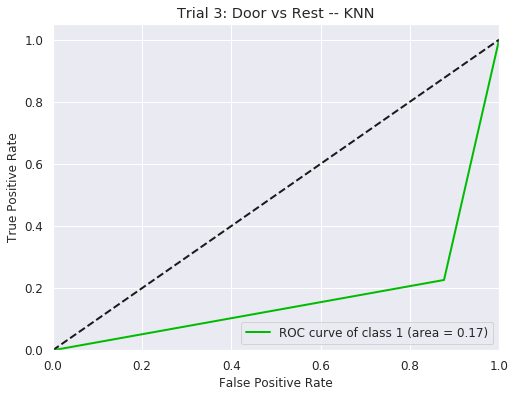

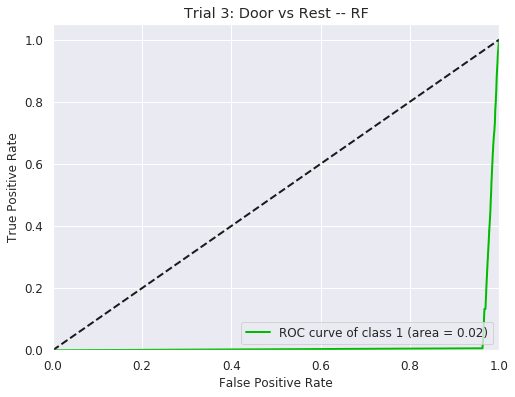

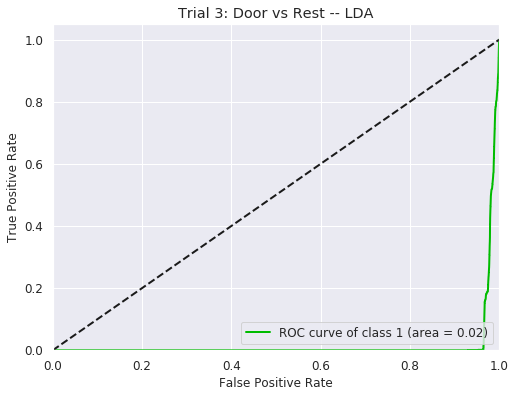

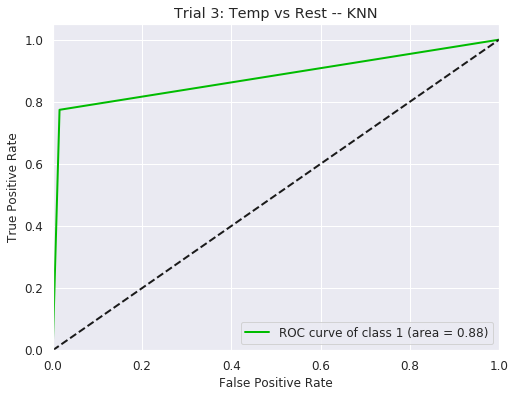

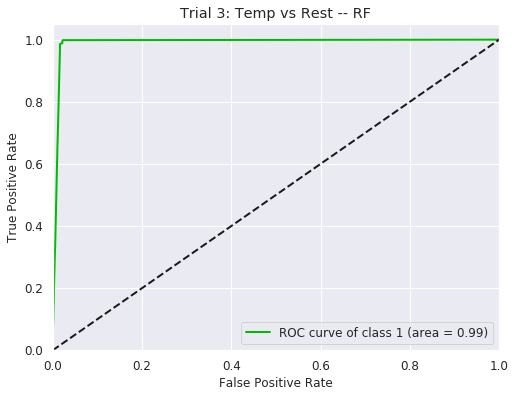

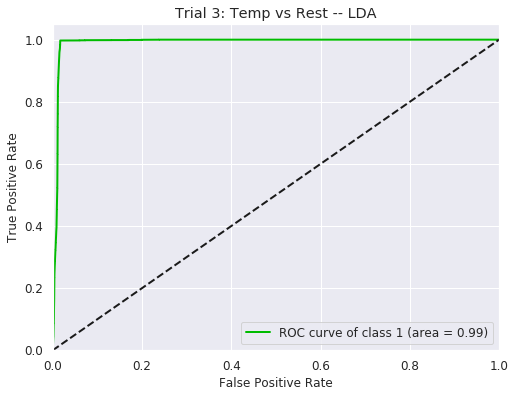

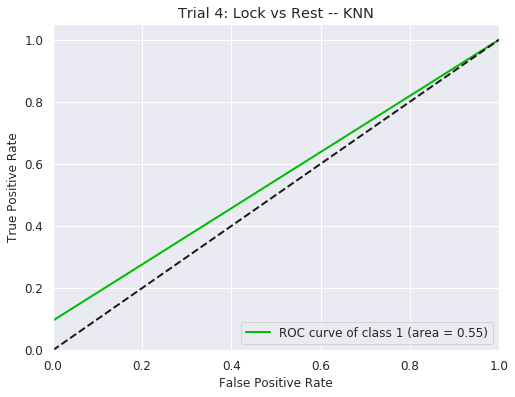

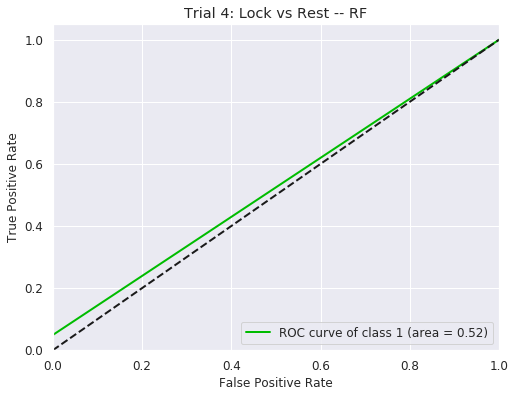

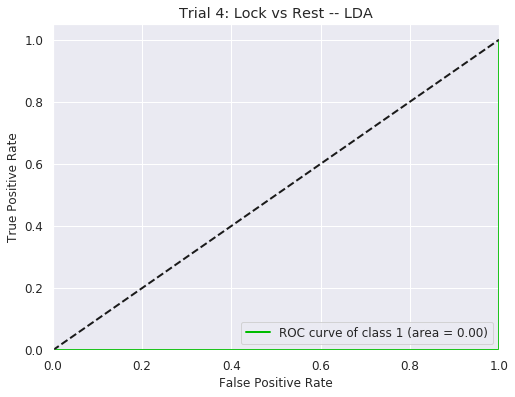

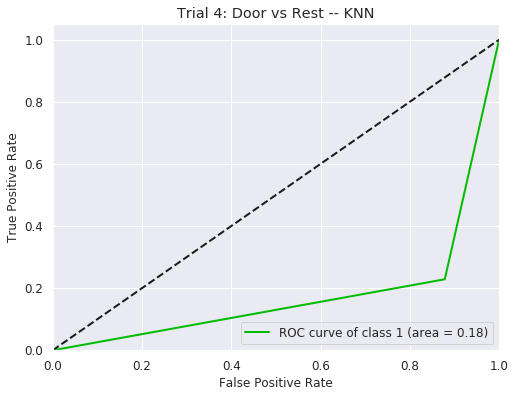

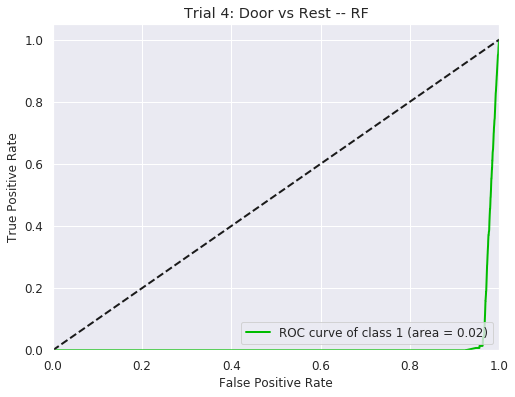

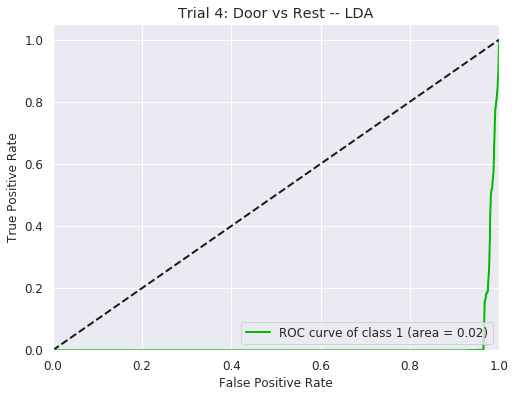

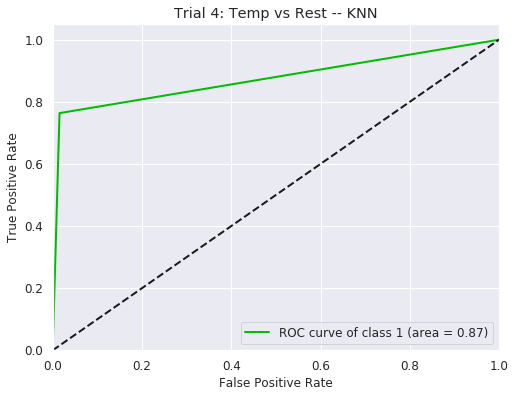

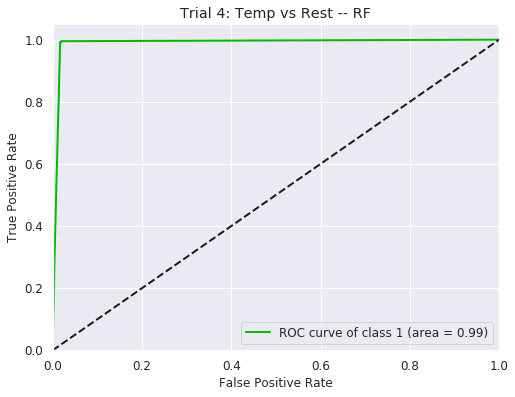

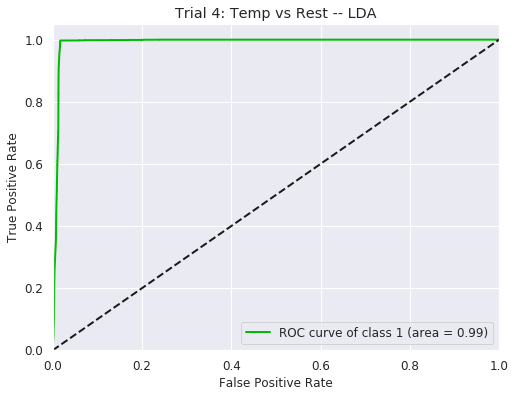

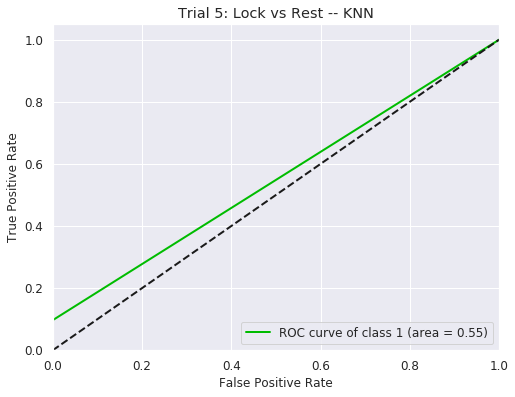

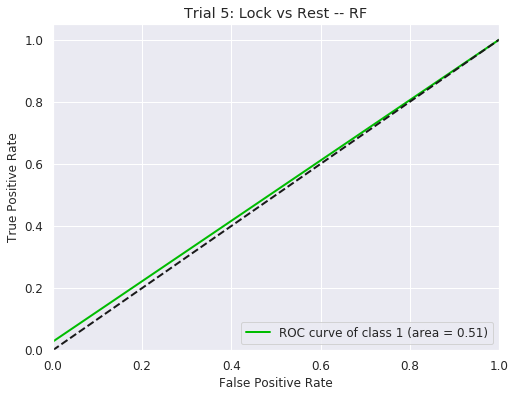

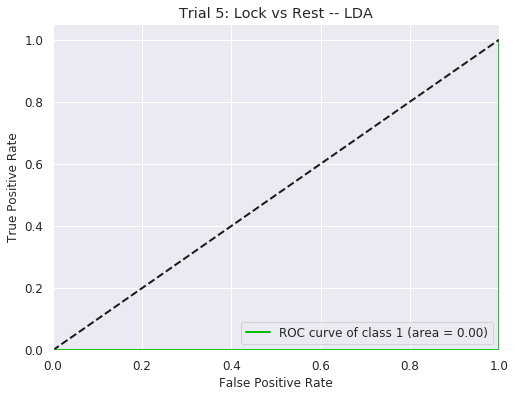

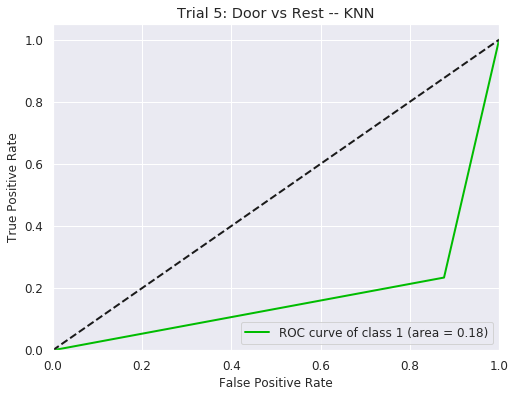

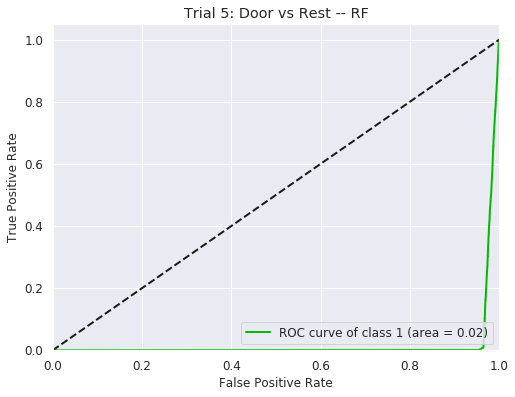

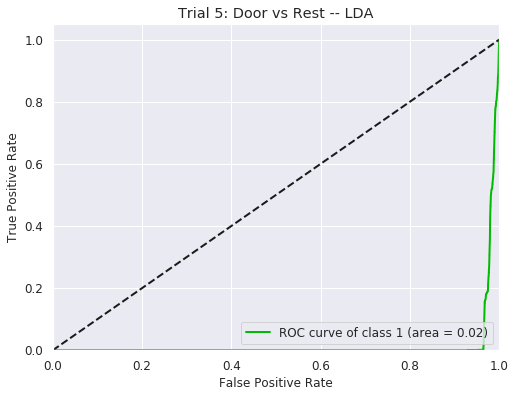

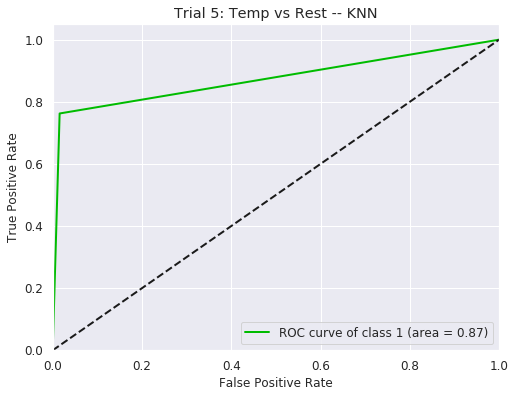

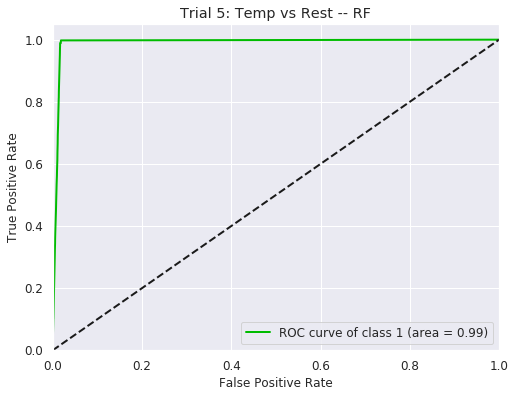

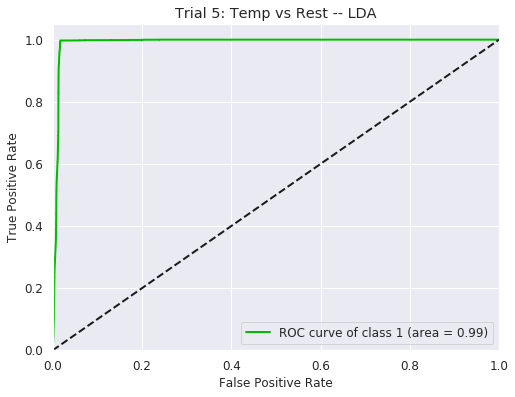

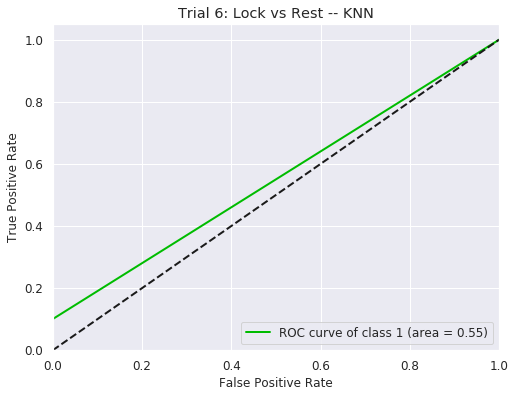

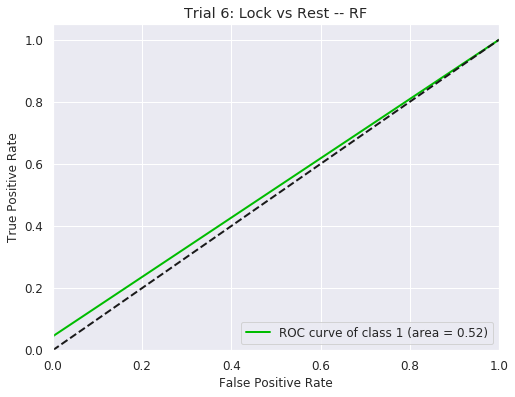

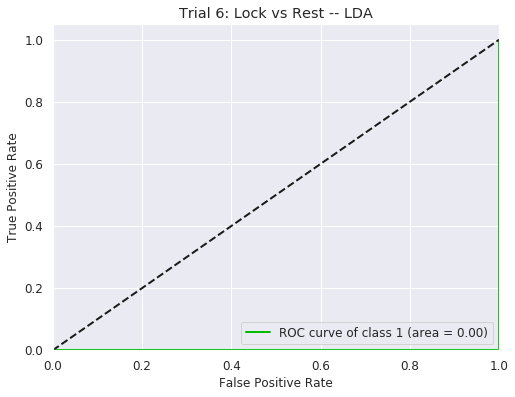

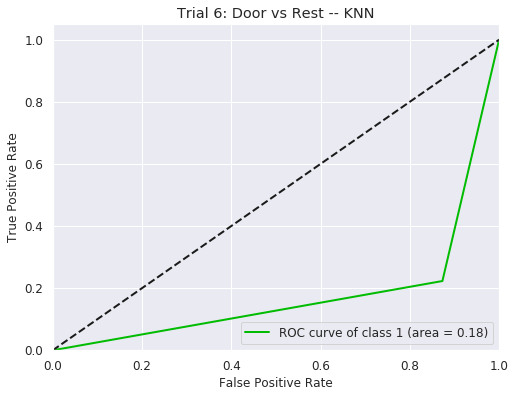

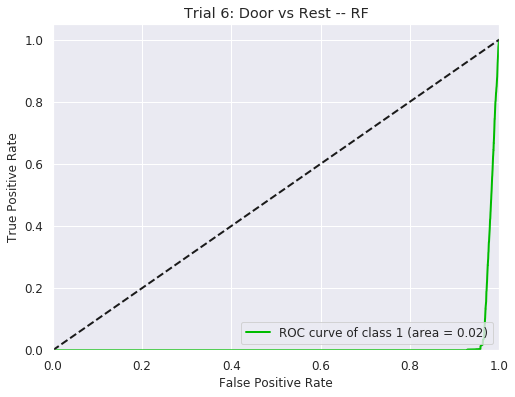

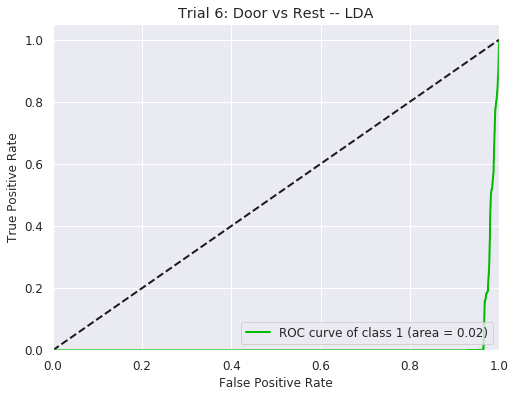

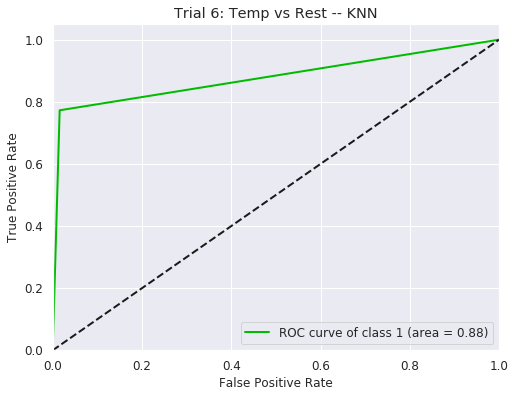

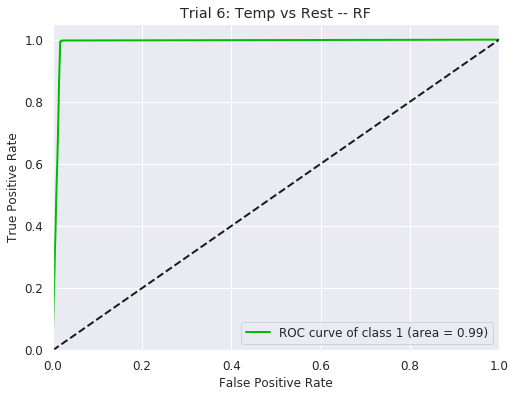

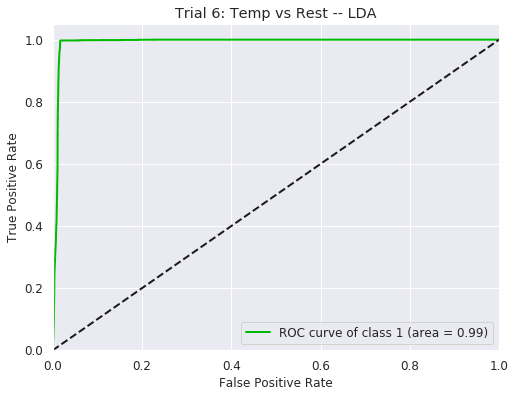

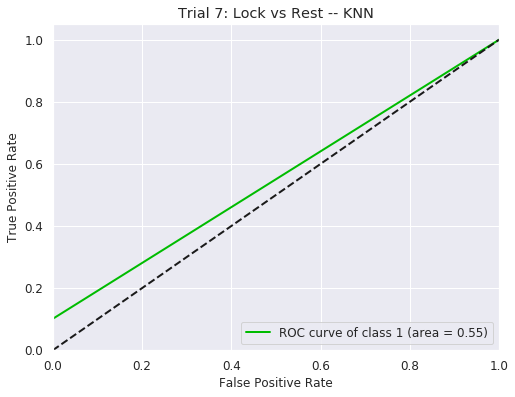

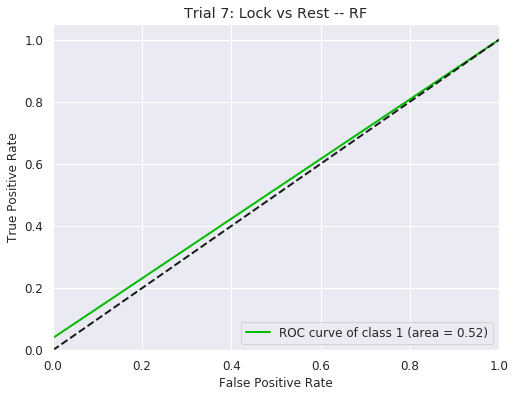

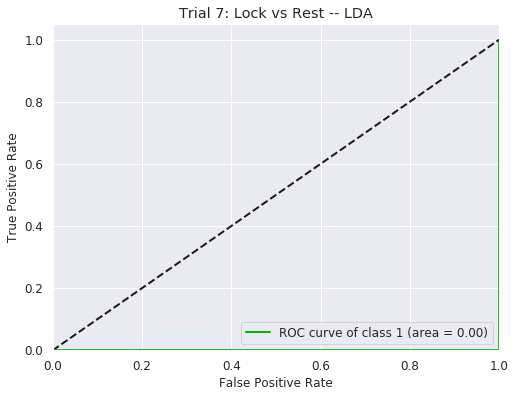

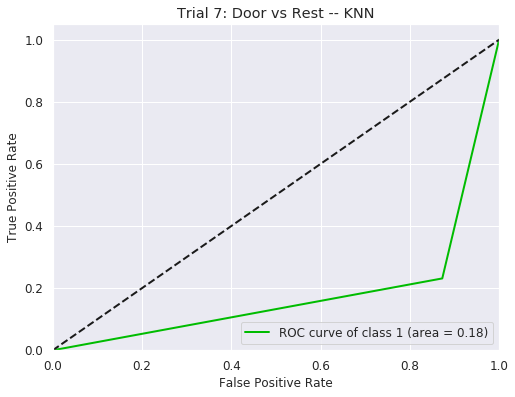

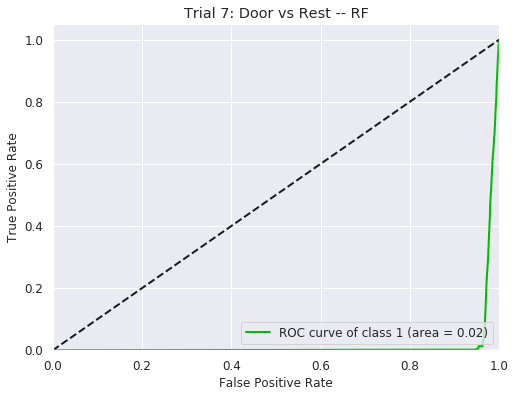

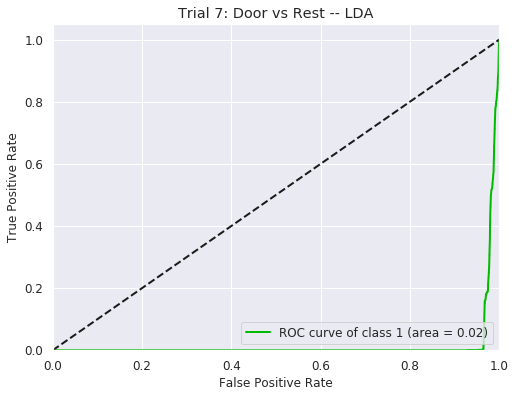

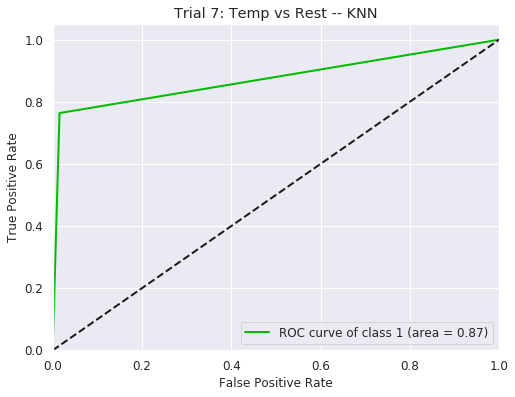

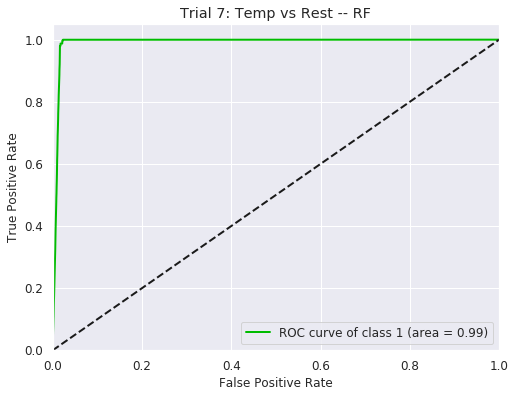

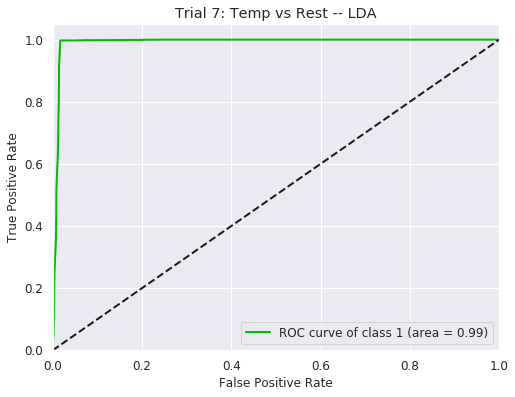

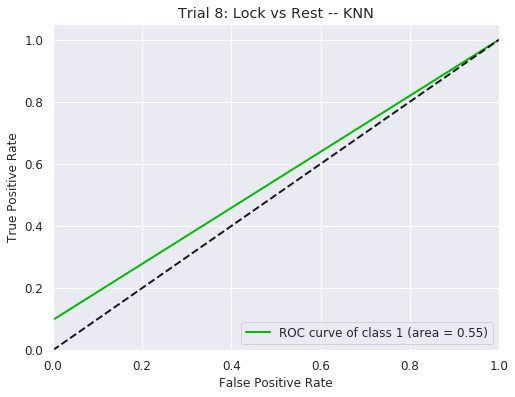

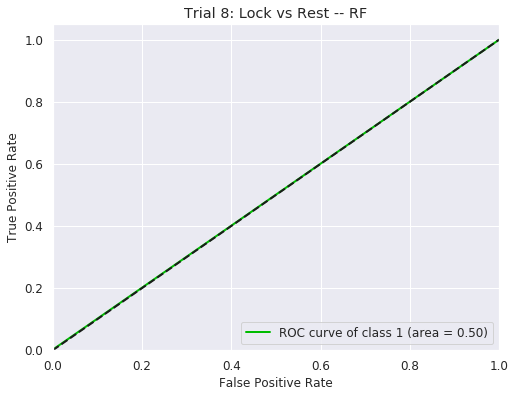

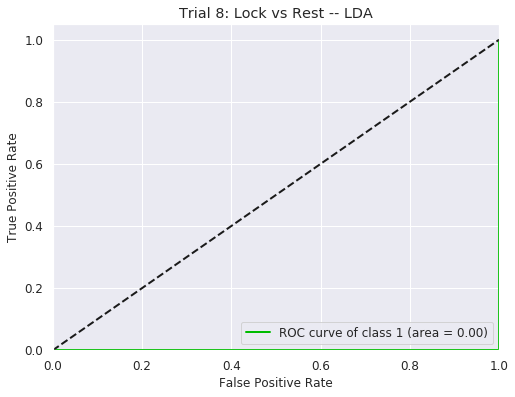

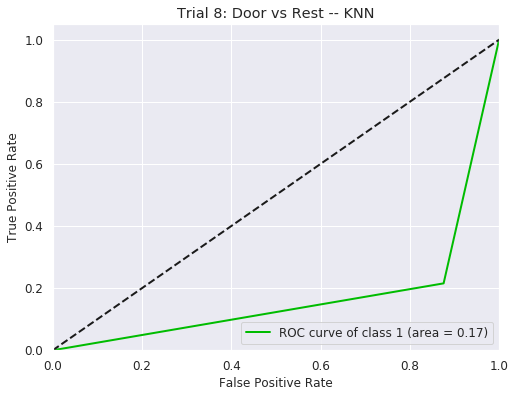

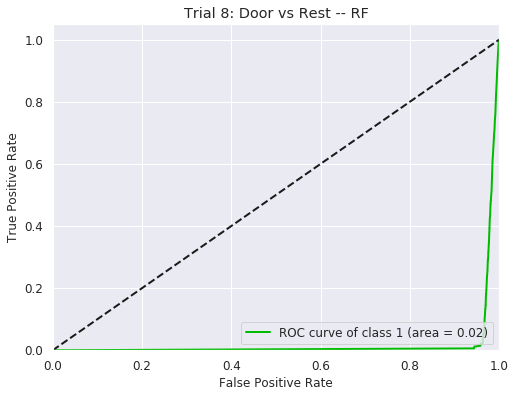

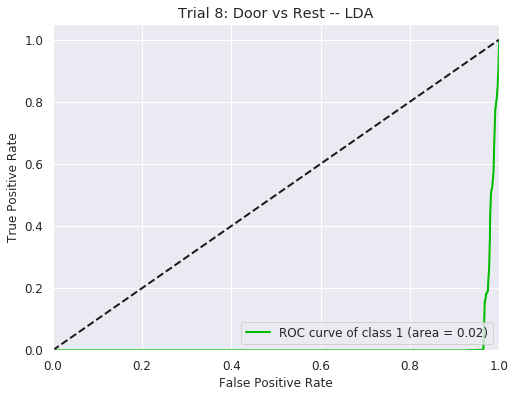

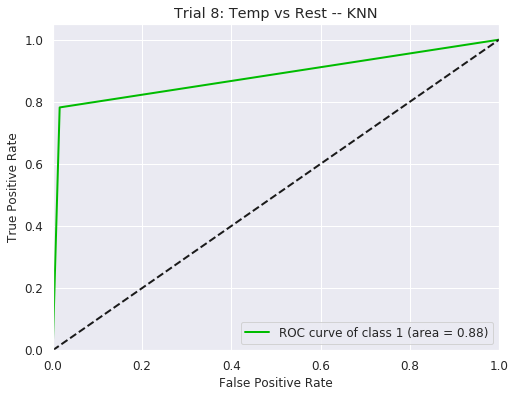

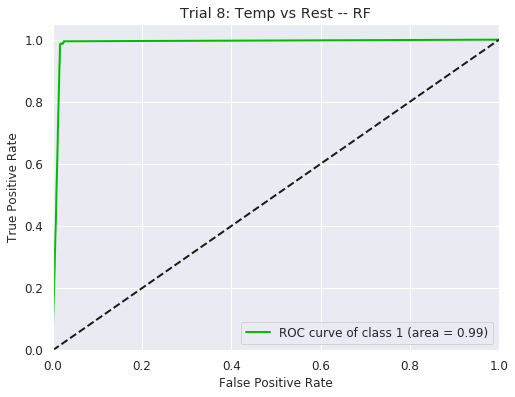

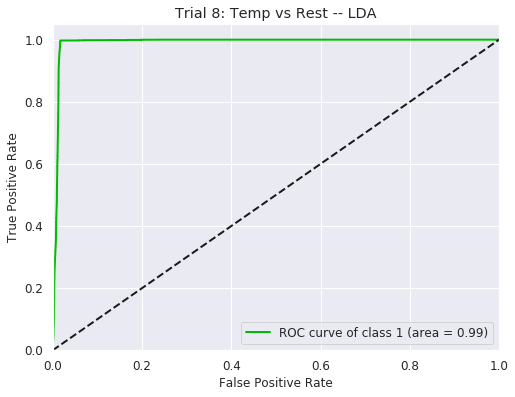

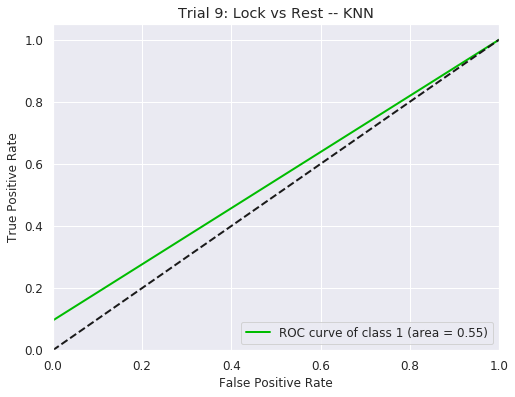

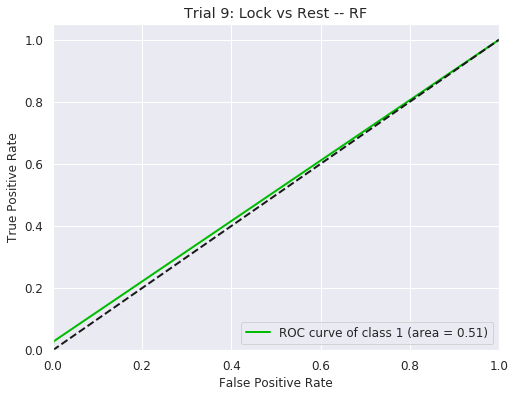

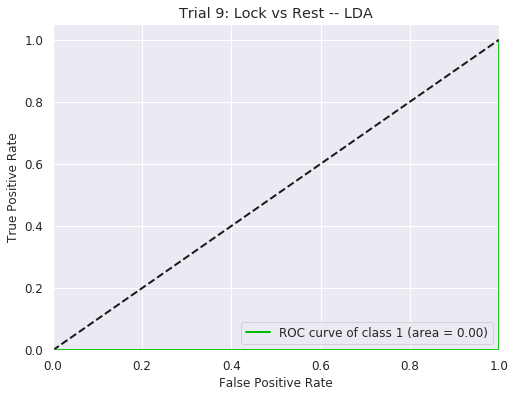

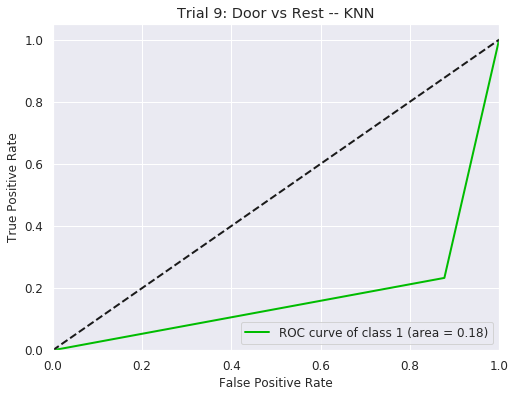

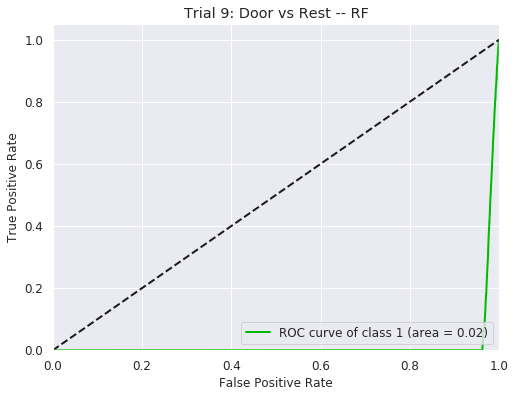

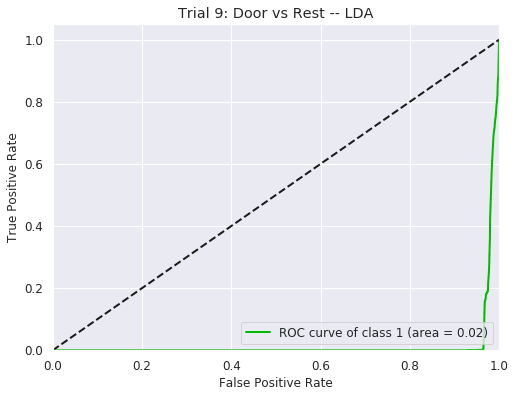

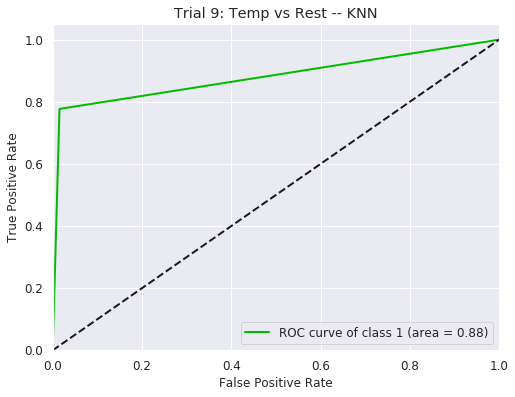

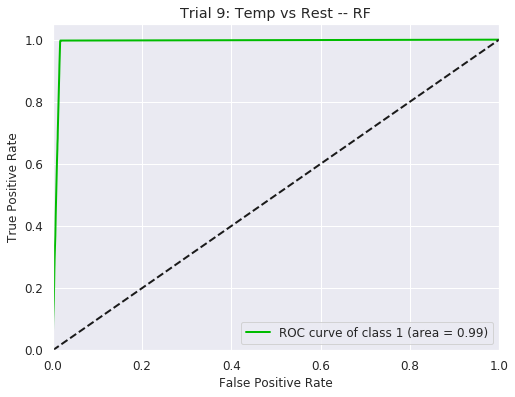

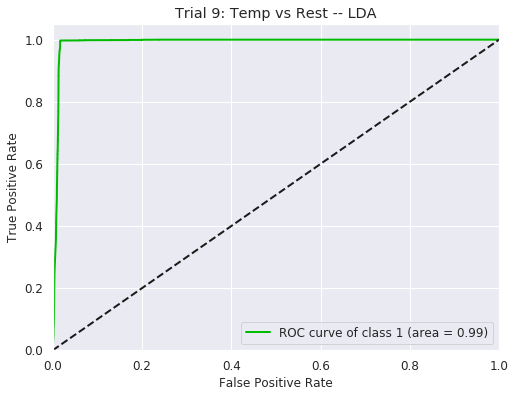

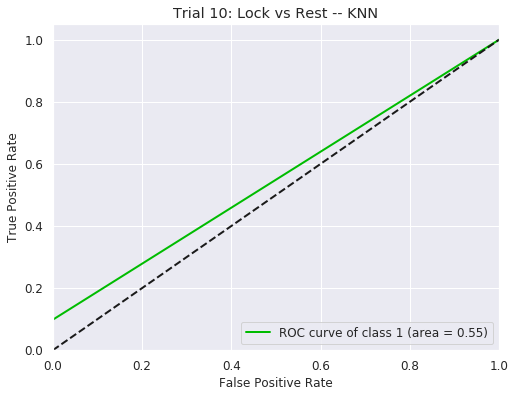

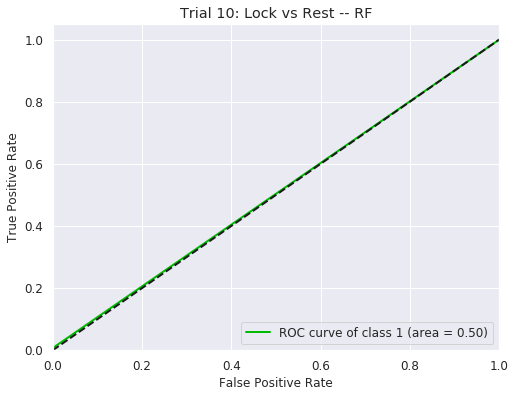

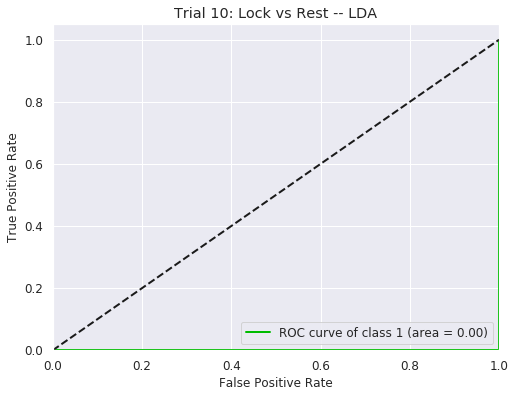

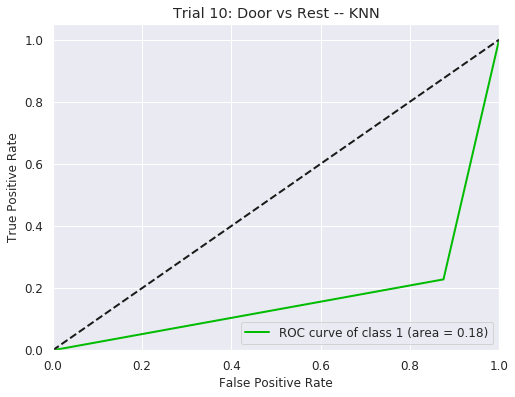

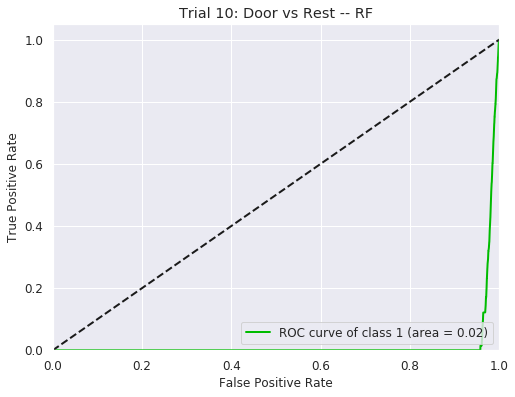

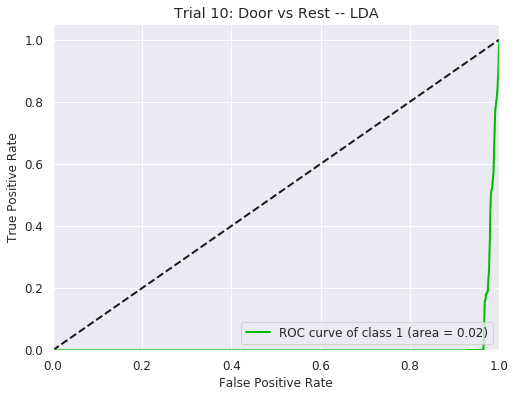

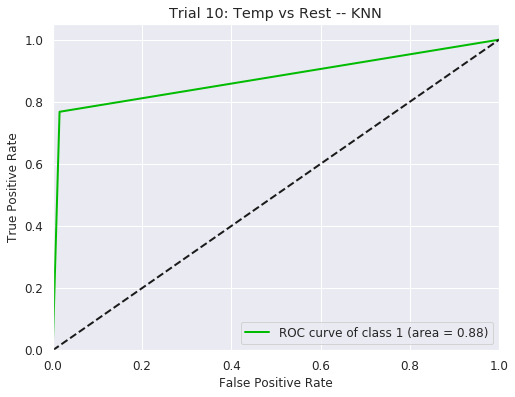

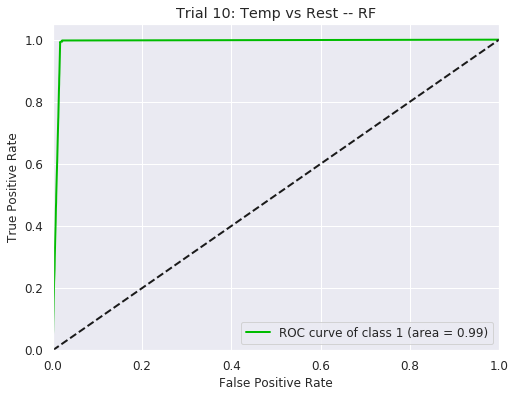

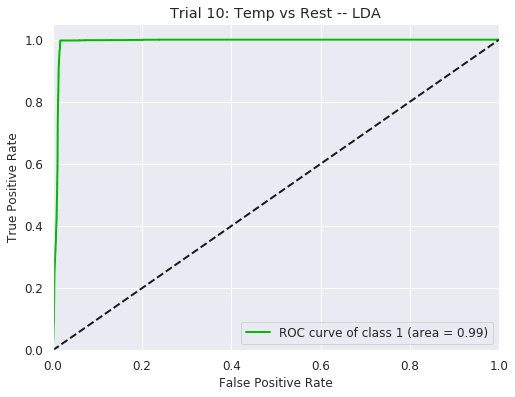

In [10]:
# Plotting ROC curves
sns.set(font_scale=1)

for trial_num, result in enumerate(df_results):
    # Extract devices and classifiers
    dev_pairs = result[0].keys()
    classifiers = result[0][dev_pairs[0]].keys()
    
    for device in dev_pairs:
        for classifier in classifiers:
            # Extract predicted probas and y_true
            pred_proba = result[0][device][classifier]['Classifier']['Pred_Proba']
            true = result[0][device][classifier]['Classifier']['True']

            # Plot ROC curve
            fpr, tpr, threshold = roc_curve(true, pred_proba[:,1], pos_label=1)
            auc = roc_auc_score(true, pred_proba[:,1])
            title = "Trial " + str(trial_num + 1) + ": " + str(device).capitalize() + " vs Rest -- " + str(classifier).upper() 
            skplt.metrics.plot_roc(true, pred_proba, title=title, plot_micro=False, plot_macro=False, 
                                   classes_to_plot=[1], figsize=(8,6));

### Time Performance

In [11]:
for trial_num, result in enumerate(df_results):
    print "Trial ", trial_num
    print "Total time:", result[1], "seconds"
    
    for device in y_list:
        for classifier in classifiers:
            title = "("+ str(device).capitalize() + ", "+str(classifier).upper() + ")"
            print title, ":", result[0][device][classifier]['Classifier']['Time'], "seconds"
    
    print ""

Trial  0
Total time: 24.5856890678 seconds
(Door, KNN) : 4.99665093422 seconds
(Door, RF) : 1.29710793495 seconds
(Door, LDA) : 0.651981115341 seconds
(Lock, KNN) : 4.99024796486 seconds
(Lock, RF) : 1.13791418076 seconds
(Lock, LDA) : 0.665252923965 seconds
(Temp, KNN) : 5.2592458725 seconds
(Temp, RF) : 1.16396594048 seconds
(Temp, LDA) : 0.660500049591 seconds

Trial  1
Total time: 24.5507950783 seconds
(Door, KNN) : 5.07641601562 seconds
(Door, RF) : 1.26561903954 seconds
(Door, LDA) : 0.664816141129 seconds
(Lock, KNN) : 5.01706409454 seconds
(Lock, RF) : 1.20263600349 seconds
(Lock, LDA) : 0.644036054611 seconds
(Temp, KNN) : 5.0731511116 seconds
(Temp, RF) : 1.18016600609 seconds
(Temp, LDA) : 0.656280994415 seconds

Trial  2
Total time: 24.5887248516 seconds
(Door, KNN) : 5.03163099289 seconds
(Door, RF) : 1.29130101204 seconds
(Door, LDA) : 0.656865119934 seconds
(Lock, KNN) : 5.06645703316 seconds
(Lock, RF) : 1.16655492783 seconds
(Lock, LDA) : 0.671602964401 seconds
(Temp, 

### Feature Importance

In [12]:
df_featImp = pd.DataFrame()
for i,f in enumerate(b.feature_importances):
    f_i = pd.Series(f, index=features_list)
    df_featImp[i] = f_i

In [19]:
import numpy as np, scipy.stats as st
a = df_featImp.iloc[:,0:30].T
lower, upper = st.t.interval(0.90, len(a)-1, loc=np.mean(a), scale=st.sem(a))

In [22]:
df_featImp['Mean'] = df_featImp.mean(axis=1)
df_featImp['StdDev'] = df_featImp.std(axis=1)
df_featImp['CI_Lower'] = lower
df_featImp['CI_Upper'] = upper

In [23]:
display(df_featImp[['Mean', 'StdDev', 'CI_Lower', 'CI_Upper']].sort_values('Mean', ascending=False))

,Mean,StdDev,CI_Lower,CI_Upper
PacketLength,0.306780,0.166526,0.256666,0.365373
BLE_LL_Length,0.248746,0.107558,0.218516,0.287616
SCAN_RSP,0.189287,0.138156,0.145278,0.236247
Assoc_Packets,0.136028,0.088181,0.108482,0.166410
ADV_IND,0.084625,0.051355,0.068783,0.102456
SCAN_REQ,0.015563,0.016336,0.010136,0.020911
Time,0.005835,0.003465,0.004771,0.007042
Channel_12,0.000414,0.000843,0.000123,0.000677
Channel_39,0.000097,0.000072,0.000074,0.000121
Channel_0,0.000092,0.000069,0.000070,0.000116


### Plots

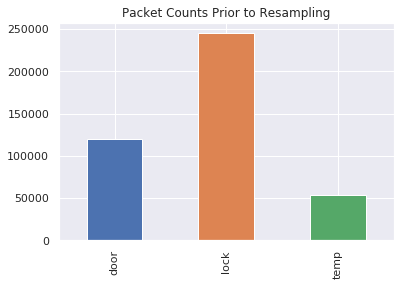

In [14]:
# Resample packets based on DeviceType
# Useful info used from https://www.kaggle.com/rafjaa/resampling-strategies-for-imbalanced-datasets#
devtype_df = df["DeviceType"].value_counts().sort_index()
devtype_df.plot(kind='bar', title="Packet Counts Prior to Resampling");

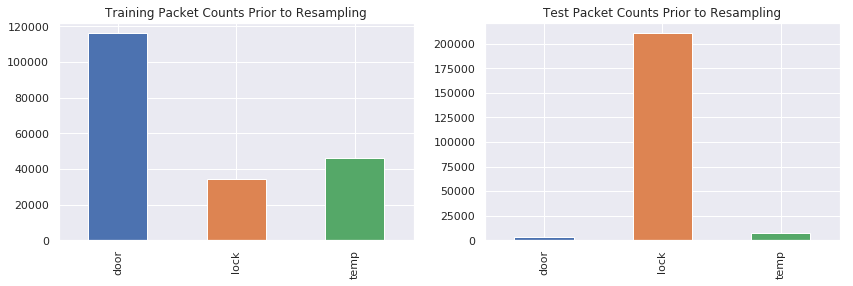

In [15]:
plt.subplots(1, 2, figsize=(14,4)) # number of rows, number of columns, figure size=(width, height)

# Plot training set
df_train = df[df["Set"]=="train"]
plt.subplot(1, 2, 1)
df_train["DeviceType"].value_counts().sort_index().plot(kind='bar', title="Training Packet Counts Prior to Resampling");

# Plot test set
df_test = df[df["Set"]=="test"]
plt.subplot(1, 2, 2)
df_test["DeviceType"].value_counts().sort_index().plot(kind='bar', title="Test Packet Counts Prior to Resampling");


/root/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


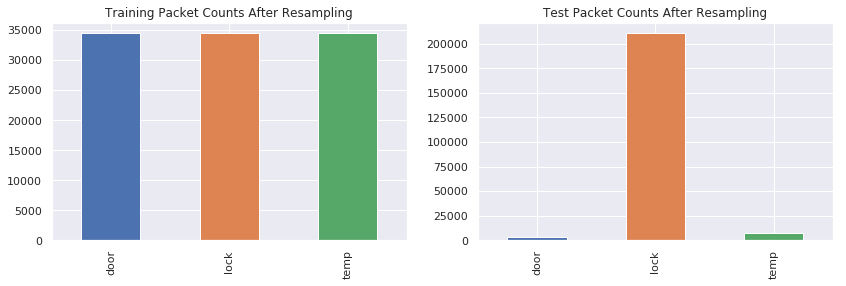

In [16]:
plt.subplots(1, 2, figsize=(14,4)) # number of rows, number of columns, figure size=(width, height)

df_train_downsampled = df_trials[0][df_trials[0]['Set']=='train']
df_test_downsampled = df_trials[0][df_trials[0]['Set']=='test']

# Plot training set
df_train_downsampled['DeviceType'] = df_train_downsampled[ble_devicetypes].idxmax(1)
plt.subplot(1, 2, 1)
df_train_downsampled['DeviceType'].value_counts().sort_index().plot(kind='bar', title="Training Packet Counts After Resampling");

# Plot test set
df_test = df[df["Set"]=="test"]
plt.subplot(1, 2, 2)
df_test["DeviceType"].value_counts().sort_index().plot(kind='bar', title="Test Packet Counts After Resampling");
